In [ ]:
!pip3 install pandas matplotlib seaborn plotly
!pip3 install geopandas folium


In [2]:
import pandas as pd

df = pd.read_csv("Electric_Vehicle_Registration_Data.csv")
df.head()

,DATE,NUMBER OF ELECTRIC VEHICLES,VEHICLE MODEL YEAR,VEHICLE MAKE,LOCATION,VEHICLE MODEL
0,2021/10/01,1,2006,TOYOTA,HALIFAX COUNTY,NaN
1,2021/10/01,1,2008,TOYOTA,HALIFAX COUNTY,NaN
2,2021/10/01,1,2009,NISSAN,VICTORIA COUNTY,NaN
3,2021/10/01,1,2009,TOYOTA,HALIFAX COUNTY,NaN
4,2021/10/01,1,2011,HYUNDAI,HALIFAX COUNTY,NaN


In [3]:
# check column names and data type
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20177 entries, 0 to 20176
Data columns (total 6 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   DATE                         20177 non-null  object
 1   NUMBER OF ELECTRIC VEHICLES  20177 non-null  int64 
 2   VEHICLE MODEL YEAR           20177 non-null  int64 
 3   VEHICLE MAKE                 20177 non-null  object
 4   LOCATION                     20177 non-null  object
 5   VEHICLE MODEL                18208 non-null  object
dtypes: int64(2), object(4)
memory usage: 945.9+ KB


In [4]:
df["DATE"] = pd.to_datetime(df["DATE"], errors="coerce")
df.head()

,DATE,NUMBER OF ELECTRIC VEHICLES,VEHICLE MODEL YEAR,VEHICLE MAKE,LOCATION,VEHICLE MODEL
0,2021-10-01,1,2006,TOYOTA,HALIFAX COUNTY,NaN
1,2021-10-01,1,2008,TOYOTA,HALIFAX COUNTY,NaN
2,2021-10-01,1,2009,NISSAN,VICTORIA COUNTY,NaN
3,2021-10-01,1,2009,TOYOTA,HALIFAX COUNTY,NaN
4,2021-10-01,1,2011,HYUNDAI,HALIFAX COUNTY,NaN


In [5]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20177 entries, 0 to 20176
Data columns (total 6 columns):
 #   Column                       Non-Null Count  Dtype         
---  ------                       --------------  -----         
 0   DATE                         20177 non-null  datetime64[ns]
 1   NUMBER OF ELECTRIC VEHICLES  20177 non-null  int64         
 2   VEHICLE MODEL YEAR           20177 non-null  int64         
 3   VEHICLE MAKE                 20177 non-null  object        
 4   LOCATION                     20177 non-null  object        
 5   VEHICLE MODEL                18208 non-null  object        
dtypes: datetime64[ns](1), int64(2), object(3)
memory usage: 945.9+ KB


In [6]:
df.isnull().sum()


DATE                              0
NUMBER OF ELECTRIC VEHICLES       0
VEHICLE MODEL YEAR                0
VEHICLE MAKE                      0
LOCATION                          0
VEHICLE MODEL                  1969
dtype: int64

In [7]:
df["VEHICLE MODEL"] = df["VEHICLE MODEL"].fillna("unknown")
df. head()

,DATE,NUMBER OF ELECTRIC VEHICLES,VEHICLE MODEL YEAR,VEHICLE MAKE,LOCATION,VEHICLE MODEL
0,2021-10-01,1,2006,TOYOTA,HALIFAX COUNTY,unknown
1,2021-10-01,1,2008,TOYOTA,HALIFAX COUNTY,unknown
2,2021-10-01,1,2009,NISSAN,VICTORIA COUNTY,unknown
3,2021-10-01,1,2009,TOYOTA,HALIFAX COUNTY,unknown
4,2021-10-01,1,2011,HYUNDAI,HALIFAX COUNTY,unknown


In [8]:
df.isnull().sum()


DATE                           0
NUMBER OF ELECTRIC VEHICLES    0
VEHICLE MODEL YEAR             0
VEHICLE MAKE                   0
LOCATION                       0
VEHICLE MODEL                  0
dtype: int64

In [9]:
# df.duplicated.sum()

df[df.duplicated()]

,DATE,NUMBER OF ELECTRIC VEHICLES,VEHICLE MODEL YEAR,VEHICLE MAKE,LOCATION,VEHICLE MODEL
260,2022-01-01,1,2013,NISSAN,ANNAPOLIS COUNTY,unknown
673,2022-07-01,1,2019,HYUNDAI,COLCHESTER COUNTY,unknown
1053,2023-01-01,1,2019,CHEVROLET,ANTIGONISH,unknown
1404,2023-01-01,1,2023,HYUNDAI,ANTIGONISH,unknown
1584,2023-06-01,1,2019,CHEVROLET,ANTIGONISH,unknown
...,...,...,...,...,...,...
20171,2025-07-01,1,2022,TESLA,DIGBY COUNTY,MODEL 3
20172,2025-07-01,1,2022,TESLA,HALIFAX COUNTY,MODEL 3
20173,2025-07-01,1,2019,CHEVROLET,HALIFAX COUNTY,BOLT
20174,2025-07-01,1,2025,KIA,HALIFAX COUNTY,NIRO


In [10]:
df = df.drop_duplicates()

In [11]:
df[df.duplicated()].head()


,DATE,NUMBER OF ELECTRIC VEHICLES,VEHICLE MODEL YEAR,VEHICLE MAKE,LOCATION,VEHICLE MODEL


In [12]:
df.columns = [c.strip().replace(" ", "_").lower() for c in df.columns]

In [13]:
df.head()

,date,number_of_electric_vehicles,vehicle_model_year,vehicle_make,location,vehicle_model
0,2021-10-01,1,2006,TOYOTA,HALIFAX COUNTY,unknown
1,2021-10-01,1,2008,TOYOTA,HALIFAX COUNTY,unknown
2,2021-10-01,1,2009,NISSAN,VICTORIA COUNTY,unknown
3,2021-10-01,1,2009,TOYOTA,HALIFAX COUNTY,unknown
4,2021-10-01,1,2011,HYUNDAI,HALIFAX COUNTY,unknown


In [14]:
df.describe(include="all")

,date,number_of_electric_vehicles,vehicle_model_year,vehicle_make,location,vehicle_model
count,7901,7901.000000,7901.000000,7901,7901,7901
unique,NaN,NaN,NaN,75,57,457
top,NaN,NaN,NaN,TESLA,HALIFAX COUNTY,unknown
freq,NaN,NaN,NaN,1612,2398,1961
mean,2024-04-25 01:22:33.702063360,1.642450,2020.905835,NaN,NaN,NaN
min,2021-10-01 00:00:00,1.000000,1978.000000,NaN,NaN,NaN
25%,2024-01-22 00:00:00,1.000000,2019.000000,NaN,NaN,NaN
50%,2024-06-01 00:00:00,1.000000,2022.000000,NaN,NaN,NaN
75%,2025-01-01 00:00:00,1.000000,2023.000000,NaN,NaN,NaN
max,2025-07-01 00:00:00,158.000000,2026.000000,NaN,NaN,NaN


In [15]:
df["vehicle_make"].value_counts().head(10)

vehicle_make
TESLA         1612
HYUNDAI       1317
FORD          1003
CHEVROLET      827
KIA            505
NISSAN         449
TOYOTA         321
VOLKSWAGEN     237
AUDI           232
BMW            162
Name: count, dtype: int64

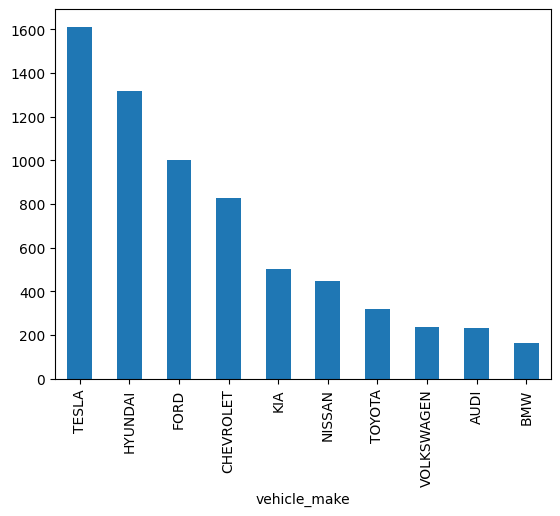

In [16]:
import matplotlib.pyplot as plt

# Top 10 vehicle makes
df["vehicle_make"].value_counts().head(10).plot(kind="bar")
plt.show()

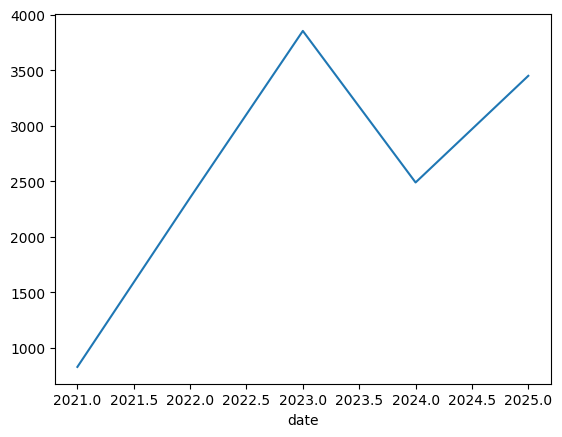

In [17]:
# Vehicles over time
df.groupby(df["date"].dt.year)["number_of_electric_vehicles"].sum().plot()
plt.show()

In [ ]:
''' Once you’ve:
Converted the DATE column → datetime
Handled missing values (vehicle_model)
Checked & dropped duplicates (if any)
Standardized column names

Your dataset will be analysis-ready.
At that stage, you can move into Exploratory Data Analysis (EDA):
Which makes are most popular?
How does the number of electric vehicles change over years?
Which locations have the highest adoption?
Do certain models dominate specific regions?'''

In [20]:
df.shape

(7901, 6)

In [21]:
df.head()

,date,number_of_electric_vehicles,vehicle_model_year,vehicle_make,location,vehicle_model
0,2021-10-01,1,2006,TOYOTA,HALIFAX COUNTY,unknown
1,2021-10-01,1,2008,TOYOTA,HALIFAX COUNTY,unknown
2,2021-10-01,1,2009,NISSAN,VICTORIA COUNTY,unknown
3,2021-10-01,1,2009,TOYOTA,HALIFAX COUNTY,unknown
4,2021-10-01,1,2011,HYUNDAI,HALIFAX COUNTY,unknown


In [22]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7901 entries, 0 to 20175
Data columns (total 6 columns):
 #   Column                       Non-Null Count  Dtype         
---  ------                       --------------  -----         
 0   date                         7901 non-null   datetime64[ns]
 1   number_of_electric_vehicles  7901 non-null   int64         
 2   vehicle_model_year           7901 non-null   int64         
 3   vehicle_make                 7901 non-null   object        
 4   location                     7901 non-null   object        
 5   vehicle_model                7901 non-null   object        
dtypes: datetime64[ns](1), int64(2), object(3)
memory usage: 432.1+ KB


In [23]:
df.describe(include="all")

,date,number_of_electric_vehicles,vehicle_model_year,vehicle_make,location,vehicle_model
count,7901,7901.000000,7901.000000,7901,7901,7901
unique,NaN,NaN,NaN,75,57,457
top,NaN,NaN,NaN,TESLA,HALIFAX COUNTY,unknown
freq,NaN,NaN,NaN,1612,2398,1961
mean,2024-04-25 01:22:33.702063360,1.642450,2020.905835,NaN,NaN,NaN
min,2021-10-01 00:00:00,1.000000,1978.000000,NaN,NaN,NaN
25%,2024-01-22 00:00:00,1.000000,2019.000000,NaN,NaN,NaN
50%,2024-06-01 00:00:00,1.000000,2022.000000,NaN,NaN,NaN
75%,2025-01-01 00:00:00,1.000000,2023.000000,NaN,NaN,NaN
max,2025-07-01 00:00:00,158.000000,2026.000000,NaN,NaN,NaN


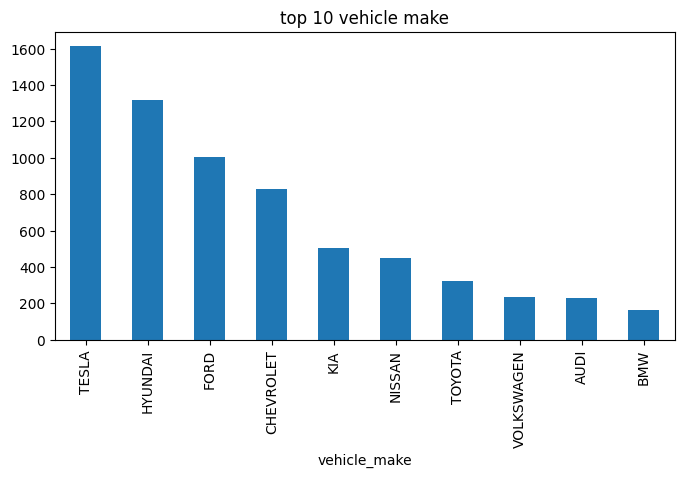

In [24]:
# Vehicle makes (Top 10)
df["vehicle_make"].value_counts().head(10).plot(kind="bar", figsize=(8,4))
plt.title("top 10 vehicle make")
plt.show()

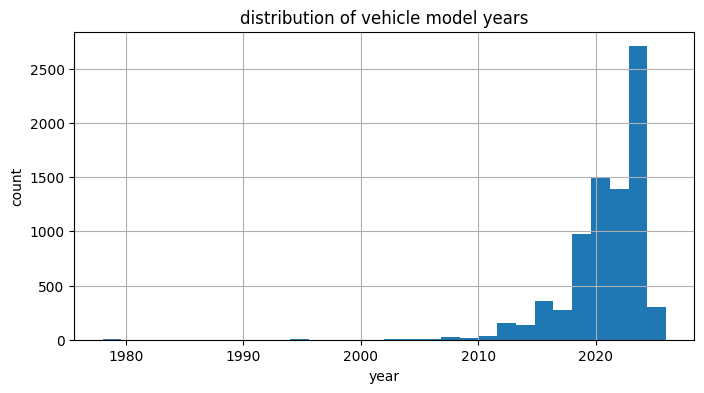

In [25]:
# Vehicle model years distribution

df["vehicle_model_year"].hist(bins=30, figsize=(8,4))
plt.title("distribution of vehicle model years")
plt.xlabel("year")
plt.ylabel("count")
plt.show()

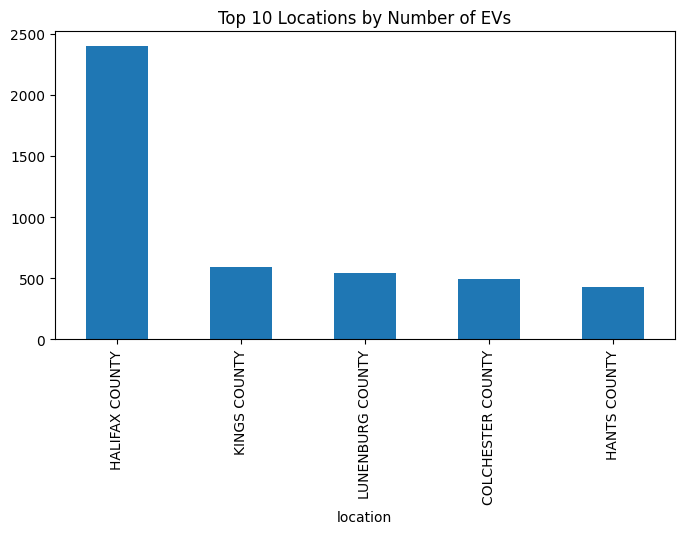

In [26]:
# Top 10 locations
df["location"].value_counts().head().plot(kind="bar", figsize=(8, 4))
plt.title("Top 10 Locations by Number of EVs")
plt.show()

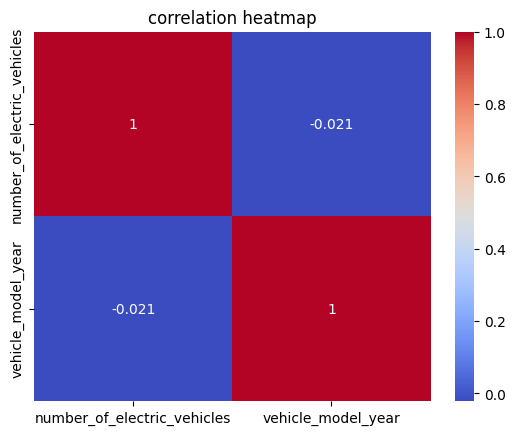

In [27]:
# Correlation heatmap (numerical columns)
import seaborn as sns
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap="coolwarm")
plt.title("correlation heatmap")
plt.show()

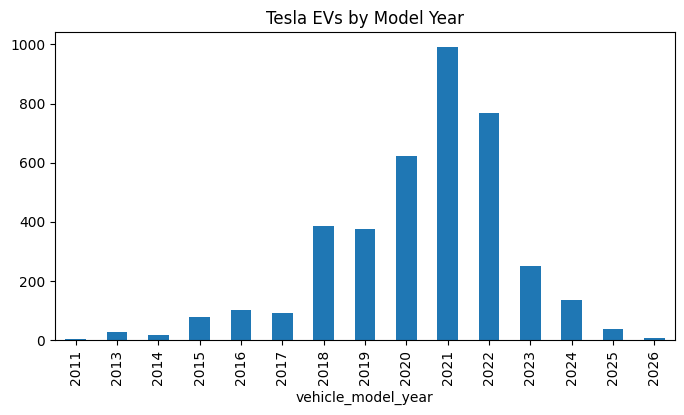

In [28]:
tesla = df[df["vehicle_make"].str.upper() == "TESLA"]
tesla.groupby("vehicle_model_year")["number_of_electric_vehicles"].sum().plot(kind="bar", figsize=(8,4))
plt.title("Tesla EVs by Model Year")
plt.show()

In [29]:
''' Once you’ve done the basic EDA (counts, distributions, trends), you can refine the analysis to answer deeper questions.
we can refine the analysis (e.g., forecasting growth, clustering locations, comparing makes over time).'''

' Once you’ve done the basic EDA (counts, distributions, trends), you can refine the analysis to answer deeper questions.\nwe can refine the analysis (e.g., forecasting growth, clustering locations, comparing makes over time).'

In [31]:
# Vehicles by year
ev_by_year = df.groupby(df["date"].dt.year)["number_of_electric_vehicles"].sum()
print(ev_by_year)

date
2021     830
2022    2353
2023    3854
2024    2490
2025    3450
Name: number_of_electric_vehicles, dtype: int64


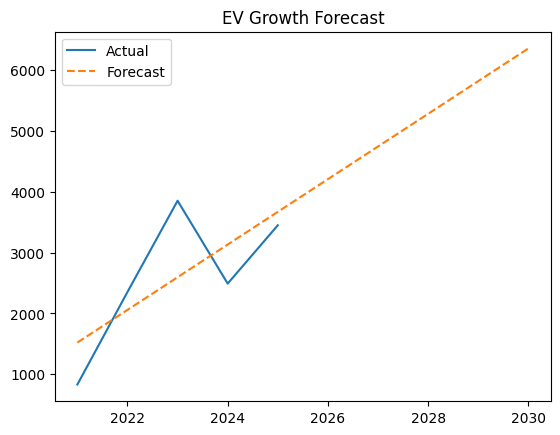

In [43]:
# Simple forecast using linear regression
from sklearn.linear_model import LinearRegression
import numpy as np

X = np.array(ev_by_year.index).reshape(-1,1)
Y = ev_by_year.values

model = LinearRegression().fit(X, Y)
future_years = np.array(range(ev_by_year.index.min(), ev_by_year.index.max() + 6)).reshape(-1, 1)
predictions = model.predict(future_years)

plt.plot(ev_by_year.index, Y, label="Actual")
plt.plot(future_years, predictions, "--", label="Forecast")
plt.legend()
plt.title("EV Growth Forecast")
plt.show()


In [ ]:
!pip3 install scikit-learn

In [41]:
import sklearn
print(sklearn.__version__)

1.7.1


In [44]:
from sklearn.cluster import KMeans

# Aggregate EVs by location
ev_by_location = df.groupby("location")["number_of_electric_vehicles"].sum().reset_index()

# KMeans clustering (e.g., 3 clusters)
kmeans = KMeans(n_clusters=3, random_state=42).fit(ev_by_location[["number_of_electric_vehicles"]])
ev_by_location["cluster"] = kmeans.labels_

ev_by_location.head()


,location,number_of_electric_vehicles,cluster
0,AMHERST,16,1
1,ANNAPOLIS,82,1
2,ANNAPOLIS COUNTY,328,1
3,ANNAPOLIS ROYAL,2,1
4,ANTIGONISH,73,1


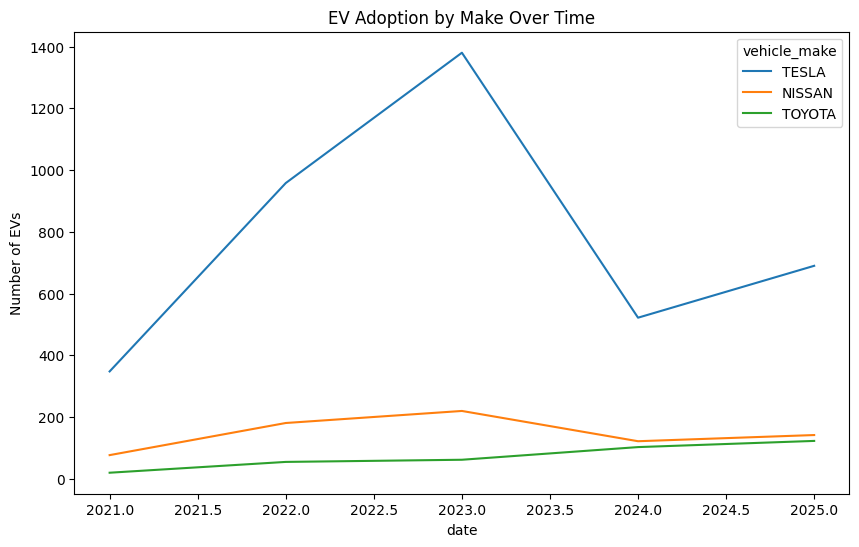

In [45]:
ev_by_make_year = df.groupby([df["date"].dt.year, "vehicle_make"])["number_of_electric_vehicles"].sum().unstack().fillna(0)

# Plot top 3 makes
ev_by_make_year[["TESLA", "NISSAN", "TOYOTA"]].plot(figsize=(10,6))
plt.title("EV Adoption by Make Over Time")
plt.ylabel("Number of EVs")
plt.show()
